### Prediciting the price of land in a region in the US with a historic data on size of the land with the price.

In [16]:
# Import the libraries needed

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt


In [17]:
# import the dataset
dataset = pd.read_csv('/Users/lambertagunbiade/Desktop/SUPERVISED MACHINE LEARNING /Regression Analysis/landprice.csv')
dataset

,Area of Land in Thousand Sq Foot,Price of Land in Million USD
0,91,12.0
1,66,7.0
2,72,8.0
3,73,8.1
4,60,7.0
5,86,11.0
6,66,7.0
7,56,6.0
8,85,11.0
9,95,12.0


• The dataset is two variables: Area of the land in thousand squarefoot and price of the land in million dollars.

#### Assign two varibles X , Y for the area and price of the land respectively.
• Note: The price of the land (Y) is the independent variable which will be determined by the area of the land.

#### Separate the response variable from the from the predictor

In [18]:
X = dataset.iloc[0:, 0].values # read all rows from index zero to row number 22. i.e 23 and first column i.e '0'
Y = dataset.iloc[0:, -1].values # All rows and the last column. ---For this, we consider the last column. i.e '-1'

#### View the data set of the respective variables


In [19]:
print(X)

[ 91  66  72  73  60  86  66  56  85  95  94 120  90  75 114 153  37 150
  76 100  79  80  78]


In [20]:
print(Y)

[12.   7.   8.   8.1  7.  11.   7.   6.  11.  12.  12.  15.  12.   8.
 14.  19.   4.  19.   9.  13.   9.1  9.3 13. ]


In [21]:
# Now split X and Y into training and testing data
X_train,X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.4, random_state=0)

#### Instatiate the linear regression object to fit the dataset. However, our dataset has been splitted into one variable each.

In [22]:
# i.e X_train,X_test, Y_train, Y_test each contains one variable which is transformed into one dimensional array
# since the model expects a two dimensional array, the transformed variables will have to be reshaped to two dimensional array.


# However, this is different for multiple regression (more than one independent variable). In this case, the reshape
# block of code will not be required.

X_train1 = np.reshape(X_train,(-1,1))
Y_train1 = np.reshape(Y_train,(-1,1))

X_test1 = np.reshape(X_test,(-1,1))
Y_test1 = np.reshape(Y_test,(-1,1))

In [23]:
# Instatiate the linear Regression class and fit the training data with the linear regression object.
lin_regressor = LinearRegression()
lin_regressor.fit(X_train1, Y_train1)

LinearRegression()

### Model prediction
• In simple terms, give the model the areas of the land to predict the prices and check for its nearness to being a goodfit for the dataset.

In [24]:
# for the test data
Y_Predict_test1 = lin_regressor.predict(X_test1)

# For the training data 
Y_Predict_train1 = lin_regressor.predict(X_train1)

In [25]:
print('Predicted training data \n\n', Y_Predict_train1.round(2),'\n\nPredicted test data\n\n',Y_Predict_test1.round(2))

Predicted training data 

 [[ 7.74]
 [19.25]
 [ 6.92]
 [ 8.56]
 [10.48]
 [ 9.11]
 [11.71]
 [ 6.37]
 [12.4 ]
 [ 8.7 ]
 [11.17]
 [19.66]
 [11.03]] 

Predicted test data

 [[15.14]
 [11.58]
 [ 9.66]
 [14.32]
 [ 9.52]
 [ 7.74]
 [ 8.97]
 [ 9.39]
 [ 3.77]
 [10.34]]


## MODEL PERFORMANCE

#### Model Performance on test data

In [26]:
# Original size of the land
print('Actual price($)\n\n', X_test1)

Actual price($)

 [[120]
 [ 94]
 [ 80]
 [114]
 [ 79]
 [ 66]
 [ 75]
 [ 78]
 [ 37]
 [ 85]]


#### Comparing actual price of the land with the predicted price of the land

In [27]:
print('Actual price($)\n\n', Y_test1,'\n\n Predicted price($)\n\n', Y_Predict_test1.round(2))

Actual price($)

 [[15. ]
 [12. ]
 [ 9.3]
 [14. ]
 [ 9.1]
 [ 7. ]
 [ 8. ]
 [13. ]
 [ 4. ]
 [11. ]] 

 Predicted price($)

 [[15.14]
 [11.58]
 [ 9.66]
 [14.32]
 [ 9.52]
 [ 7.74]
 [ 8.97]
 [ 9.39]
 [ 3.77]
 [10.34]]


Obviously, the model almost predicted the exact price of the land at a close margine.
This shows this model is doing well in this regard

#### Model Performance on training data

In [28]:
# Predicted areas of land in thousand square foot
print('Actual price($)\n\n', X_train1)

Actual price($)

 [[ 66]
 [150]
 [ 60]
 [ 72]
 [ 86]
 [ 76]
 [ 95]
 [ 56]
 [100]
 [ 73]
 [ 91]
 [153]
 [ 90]]


####  Actual trainning Prices versus predicted prices

In [29]:
print('Actual training price($)\n\n', Y_train1,'\n\n Predicted price($)\n\n', Y_Predict_train1.round(2))

Actual training price($)

 [[ 7. ]
 [19. ]
 [ 7. ]
 [ 8. ]
 [11. ]
 [ 9. ]
 [12. ]
 [ 6. ]
 [13. ]
 [ 8.1]
 [12. ]
 [19. ]
 [12. ]] 

 Predicted price($)

 [[ 7.74]
 [19.25]
 [ 6.92]
 [ 8.56]
 [10.48]
 [ 9.11]
 [11.71]
 [ 6.37]
 [12.4 ]
 [ 8.7 ]
 [11.17]
 [19.66]
 [11.03]]


Originally, for an area size of 120 square foot size of land, actual is 15M USD.
However, from our test prediction, for such an area of land, the price is 15.14M USD.

A look at the size of land used for the training data and its respective prices,
our model says, for an area of land of size 66 thousand square foot, our model predicted the price as 7.74M USD as against the training price of 7M USD. 
Categorically, this model is doing well for both the training and testing data but its important we check for its erros to validate its goodness of fit for future predictions.

### Let us visualize our training and testing data on a scatter plot respectively

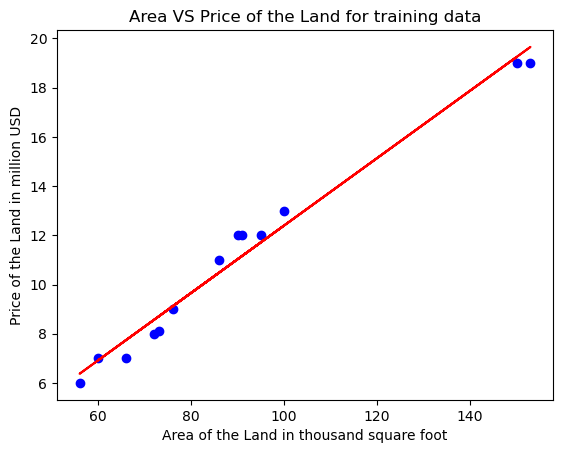

In [30]:
plt.scatter(X_train1,Y_train1, color='blue')

#plot the regression line across the data points.
# recall that, regression line is a prediction line. Hence, the second object has to be the predicted function of the dataset
plt.plot(X_train1, Y_Predict_train1, color='red')
plt.title('Area VS Price of the Land for training data')
    
plt.xlabel('Area of the Land in thousand square foot')
plt.ylabel('Price of the Land in million USD')
plt.show()

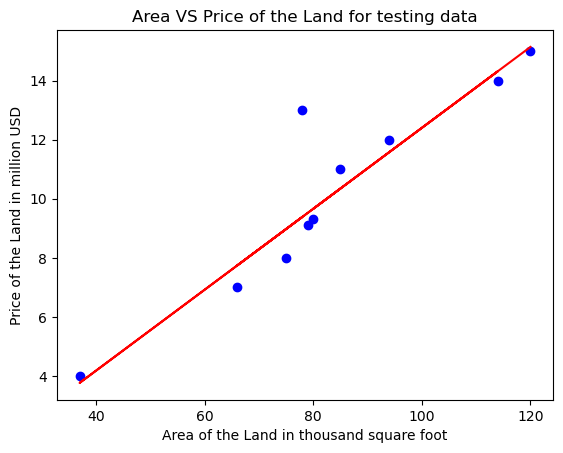

In [31]:
plt.scatter(X_test1,Y_test1, color='blue')

# recall that, regression line is a prediction line. Hence, the second object has to be the predicted function of the dataset
plt.plot(X_test1,Y_Predict_test1 ,color='red') 
    
plt.title('Area VS Price of the Land for testing data')
    
plt.xlabel('Area of the Land in thousand square foot')
plt.ylabel('Price of the Land in million USD')
plt.show()

The scatter plot shows the prices of the land(data points) at a close margine to the regression line.
This means the model is doing well for both cases.

#### Now let us visualize the original training and testing data
Recall that X, Y  denotes test ,training data for both variables from 
the split function as X and Y


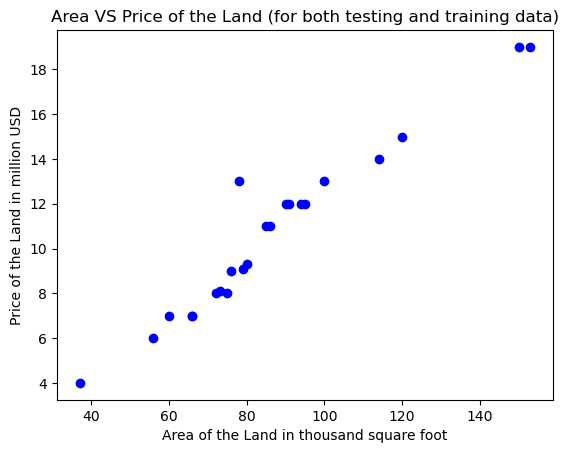

In [32]:
plt.scatter(X,Y, color='blue')

#plt.plot(X,Y ,color='red') 
    
plt.title('Area VS Price of the Land (for both testing and training data)')
    
plt.xlabel('Area of the Land in thousand square foot')
plt.ylabel('Price of the Land in million USD')
plt.show()

The red line is the model predicting line in all cases to see the nearness of all data points (prices of land) to 
the predicted values respectively.
Next we will find out the value of R-squared to see how accurately of the model for future predictions.

### Coefficient of determination (R_Squared) also known as the goodness of fit.

R-squared is a statistical measure that represents the goodness of fit of a regression model. 
The value of R-square lies between 0 to 1. Where we get R-square equals 1 when the model perfectly fits the data
and there is no difference between the predicted value and actual value.
https://www.geeksforgeeks.org/ml-r-squared-in-regression-analysis/


R-Squared (R² or the coefficient of determination) is a statistical measure in a regression model that determines 
the proportion of variance in the dependent variable that can be explained by the independent variable. 
In other words, r-squared shows how well the data fit the regression model (the goodness of fit).
https://corporatefinanceinstitute.com/resources/data-science/r-squared/

In [33]:
from sklearn.metrics import r2_score

In [34]:
#For the testing data
r_squre_test = r2_score(Y_test1, Y_Predict_test1)  # This takes two argument. The true and the predicted value

print(r_squre_test)

0.8505174170816574


* 85% variation of the test data variation can be correctly explained by the model.
This is a good value and can be used to predict future values of land.

In [35]:
#For the training data
r_squre_train = r2_score(Y_train1, Y_Predict_train1)
print(r_squre_train)

0.9801746682609226


• The model looks great and almost perfect for the training data for being able to explain 98% of the training data.

### A TEMPLATE TO PREDICT THE PRICE OF ANY AREA OF LAND WITH A GIVEN PRICE.

Task: Given an area 37 thousand square foot, predict the price of a land of size 37 thousand square foot.

**Recall that, the predict function requires two dimensional arrays. Hence, we will have to transform(reshape) the given value thus;**

In [36]:
Area = 37
# Transform the area to fit into one column and one row
trans_Area = np.reshape(Area, (1,1)) 
# invoke our instance of the regression class in line 12
Pred_Price = lin_regressor.predict(trans_Area)
print(Pred_Price.round(2))

[[3.77]]


The result shows that for an area of size 37 thousand square foot,the price predicted by the model is 3.77 million US dollars.

You can input any value of area, transform into two dimensional array and pass it into the predict function to predict the price of the land.

In [37]:
#### In other ways, we can transform the area into two dimensional array for any given area of land.
# say;

trans_Area = np.array([[254]])
Pred_Price = lin_regressor.predict(trans_Area)
print(Pred_Price.round(2))

[[33.49]]
